In [169]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from visualize import contour_with_quiver
from visualize import surf
from visualize import contour_with_path


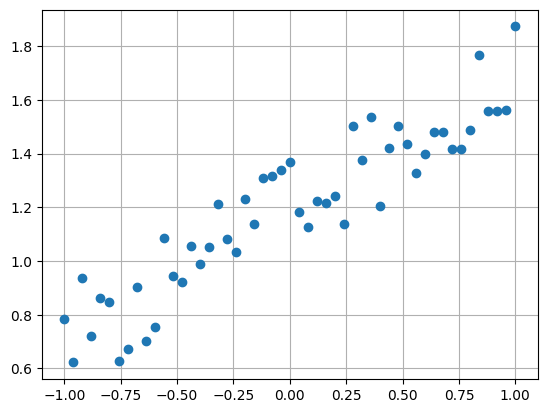

In [170]:
np.random.seed(320)
x_train=np.linspace(-1,1,51)
f=lambda x : 0.5*x+1.0
y_train = f(x_train)+0.4*np.random.rand(len(x_train))
plt.plot(x_train,y_train,'o')
plt.grid()
plt.show()

In [171]:
np.random.seed(303)
shuffled_id = np.arange(0, len(x_train))
np.random.shuffle(shuffled_id)
x_train = x_train[shuffled_id]
y_train = y_train[shuffled_id]

def loss(w, x_set, y_set):
    N = len(x_set)
    val = 0.0
    for i in range(len(x_set)):
        val += 0.5 * (w[0] * x_set[i] +w[1] - y_set[i]) ** 2
    return val / N

def loss_grad(w, x_set, y_set):
    N = len(x_set)
    val = np.zeros(len(w))
    for i in range(len(x_set)):
        er = w[0] * x_set[i] + w[1] - y_set[i]
        val += er * np.array([x_set[i], 1.0])
    return val / N

def generate_batches(batch_size, features, labels):


    
    assert len(features) == len(labels)
    output_batches = []

    sample_size=len(features)
    for start_i in range(0,sample_size,batch_size):
        end_i = start_i+batch_size
        batch=[features[start_i:end_i],labels[start_i:end_i]]
        output_batches.append(batch)
    return output_batches

<h1>Gradient Descents</h1>

In [172]:
batch_size=5
lr=0.01
MaxEpochs=51
#momentum
alpha=.9

In [173]:
w0=np.array([4.0,-1.0])
path_sgd=[]
for epoch in range(MaxEpochs):
    if epoch%10==0:
        print(epoch,w0,loss(w0,x_train,y_train))
    for x_batch,y_batch in generate_batches(batch_size,x_train,y_train):
        path_sgd.append(w0)
        grad=loss_grad(w0,x_batch,y_batch)
        w1=w0-lr*grad
        w0=w1

0 [ 4. -1.] 4.579314993864028
10 [2.90275135 0.50479397] 1.2733054655426301
20 [2.15617525 0.99182968] 0.5219595208536493
30 [1.64165673 1.14552108] 0.24713691137874
40 [1.28484796 1.19121275] 0.12268802367937626
50 [1.03666579 1.20274454] 0.06302098925267699


<h1>GD VS Momentum</h1>

In [174]:
w0=np.array([4.0,-1.0])
path_mm=[]
velocity=np.zeros_like(w0)
for epoch in range(MaxEpochs):
    if epoch%10==0:
        print(epoch,w0,loss(w0,x_train,y_train))
    for x_batch,y_batch in generate_batches(batch_size,x_train,y_train):
        path_mm.append(w0)
        grad=loss_grad(w0,x_batch,y_batch)
        velocity=alpha*velocity-lr*grad
        w1=w0+velocity
        w0=w1

0 [ 4. -1.] 4.579314993864028
10 [0.46015288 1.20399806] 0.0067860452005677994
20 [0.46545713 1.19649799] 0.006738938857924861
30 [0.4654588  1.19652139] 0.006738973504324363
40 [0.46545874 1.19652132] 0.006738973432581432
50 [0.46545874 1.19652132] 0.006738973432676338


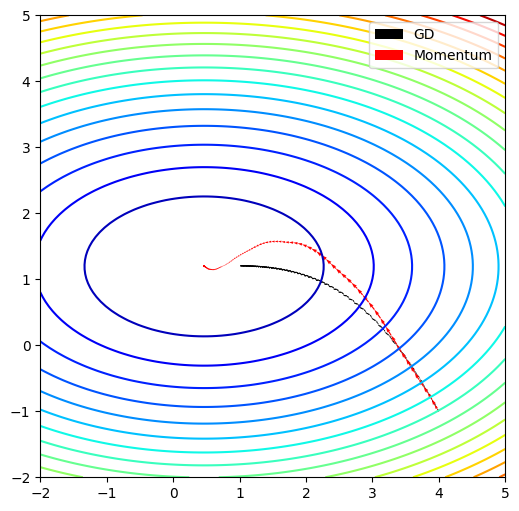

In [176]:
w0 = np.linspace(-2, 5, 101)
w1 = np.linspace(-2, 5, 101)
w0, w1 = np.meshgrid(w0, w1)
lossw = w0*0
for i in range(w0.shape[0]):
    for j in range(w0.shape[1]):
        wij = np.array([w0[i, j], w1[i, j]])
        lossw[i, j] = loss(wij, x_train, y_train)  
fig, ax = plt.subplots(figsize=(6, 6))  
ax.contour(w0, w1, lossw, cmap=plt.cm.jet, levels=np.linspace(0, max(lossw.flatten()), 20))

paths = path_sgd
paths = np.array(np.matrix(paths).T)
ax.quiver(paths[0,:-1],paths[1,:-1],paths[0,1:] - paths[0,:-1], paths[1,1:]-paths[1,:-1],scale_units='xy',angles='xy',scale=1,color='k')

paths = path_mm
paths = np.array(np.matrix(paths).T)
ax.quiver(paths[0,:-1],paths[1,:-1],paths[0,1:]-paths[0,:-1],paths[1,1:]-paths[1,:-1],scale_units='xy',angles='xy',scale=1,color='r')

plt.legend(["GD","Momentum"])
plt.show()

<h1>GD VS Adagrad</h1>

In [185]:
batch_size=5
lr=1.5
MaxEpochs=51
#adagrad
epsilon=lr
delta=1e-7

In [186]:
w0=np.array([4.0,-1.0])
path_sgd=[]
for epoch in range(MaxEpochs):
    if epoch%10==0:
        print(epoch,w0,loss(w0,x_train,y_train))
    for x_batch,y_batch in generate_batches(batch_size,x_train,y_train):
        path_sgd.append(w0)
        grad=loss_grad(w0,x_batch,y_batch)
        w1=w0-lr*grad
        w0=w1

0 [ 4. -1.] 4.579314993864028
10 [0.37841846 1.25156067] 0.009696986257930437
20 [0.37841846 1.25156067] 0.009696986257930437
30 [0.37841846 1.25156067] 0.009696986257930437
40 [0.37841846 1.25156067] 0.009696986257930437
50 [0.37841846 1.25156067] 0.009696986257930437


In [187]:
w0=np.array([4.0,-1.0])
r=np.zeros_like(w0)
path_adagd=[]
for epoch in range(MaxEpochs):
    if epoch%10==0:
        print(epoch,w0,loss(w0,x_train,y_train))
    for x_batch,y_batch in generate_batches(batch_size,x_train,y_train):
        path_adagd.append(w0)
        grad=loss_grad(w0,x_batch,y_batch)
        r=r+grad*grad
        delv=-epsilon/(delta+np.sqrt(r))*grad
        w1=w0+delv
        w0=w1

0 [ 4. -1.] 4.579314993864028
10 [0.45029247 1.19320992] 0.006787267864034907
20 [0.45037571 1.193221  ] 0.006786767788916977
30 [0.45045769 1.19323309] 0.006786275654922611
40 [0.4505384  1.19324605] 0.006785791735824285
50 [0.45061787 1.19325975] 0.00678531604690028


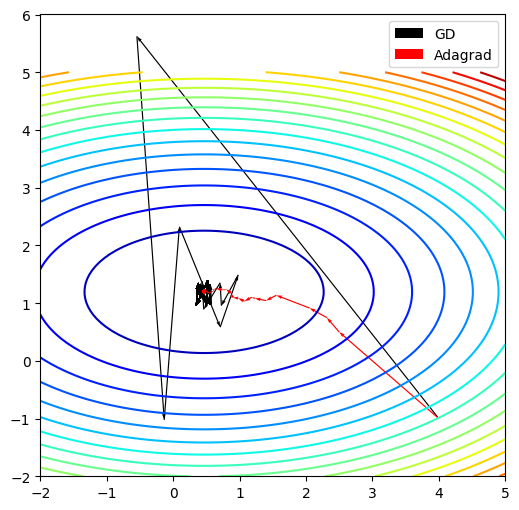

In [188]:
w0 = np.linspace(-2, 5, 101)
w1 = np.linspace(-2, 5, 101)
w0, w1 = np.meshgrid(w0, w1)
lossw = w0*0
for i in range(w0.shape[0]):
    for j in range(w0.shape[1]):
        wij = np.array([w0[i, j], w1[i, j]])
        lossw[i, j] = loss(wij, x_train, y_train)  
fig, ax = plt.subplots(figsize=(6, 6))  
ax.contour(w0, w1, lossw, cmap=plt.cm.jet, levels=np.linspace(0, max(lossw.flatten()), 20))

paths = path_sgd
paths = np.array(np.matrix(paths).T)
ax.quiver(paths[0,:-1],paths[1,:-1],paths[0,1:] - paths[0,:-1], paths[1,1:]-paths[1,:-1],scale_units='xy',angles='xy',scale=1,color='k')

paths = path_adagd
paths = np.array(np.matrix(paths).T)
ax.quiver(paths[0,:-1],paths[1,:-1],paths[0,1:]-paths[0,:-1],paths[1,1:]-paths[1,:-1],scale_units='xy',angles='xy',scale=1,color='r')

plt.legend(["GD","Adagrad"])
plt.show()

<h1>Adagard VS RMSProp</h1>

In [193]:
batch_size=10
lr=0.25
MaxEpochs=51

#adagrad
epsilon=lr
delta=1e-7

#RMSProp
rho=0.9

In [194]:
w0=np.array([4.0,-1.0])
r=np.zeros_like(w0)
path_adagd=[]
for epoch in range(MaxEpochs):
    if epoch%10==0:
        print(epoch,w0,loss(w0,x_train,y_train))
    for x_batch,y_batch in generate_batches(batch_size,x_train,y_train):
        path_adagd.append(w0)
        grad=loss_grad(w0,x_batch,y_batch)
        r=r+grad*grad
        delv=-epsilon/(delta+np.sqrt(r))*grad
        w1=w0+delv
        w0=w1

0 [ 4. -1.] 4.579314993864028
10 [1.61531839 1.0103803 ] 0.25234860047058943
20 [0.98464983 1.19069323] 0.05319649989996024
30 [0.70781151 1.20756929] 0.01686963715694185
40 [0.57927295 1.20449024] 0.00896811981984074
50 [0.51875384 1.20119493] 0.007221232402615582


In [195]:
w0=np.array([4.0,-1.0])
r=np.zeros_like(w0)
path_rmsprop=[]
for epoch in range(MaxEpochs):
    if epoch%10==0:
        print(epoch,w0,loss(w0,x_train,y_train))
    for x_batch,y_batch in generate_batches(batch_size,x_train,y_train):
        path_rmsprop.append(w0)
        grad=loss_grad(w0,x_batch,y_batch)
        r=rho*r+(1.-rho)*grad*grad
        delv=-epsilon*grad/np.sqrt(delta+r)
        w1=w0+delv
        w0=w1

0 [ 4. -1.] 4.579314993864028
10 [0.3934962  1.23710137] 0.008560057147723822
20 [0.36918262 1.25040301] 0.009930513022497476
30 [0.36923725 1.2503987 ] 0.009928422387428165
40 [0.36923801 1.25039829] 0.009928374038120736
50 [0.36923801 1.25039829] 0.009928373901061594


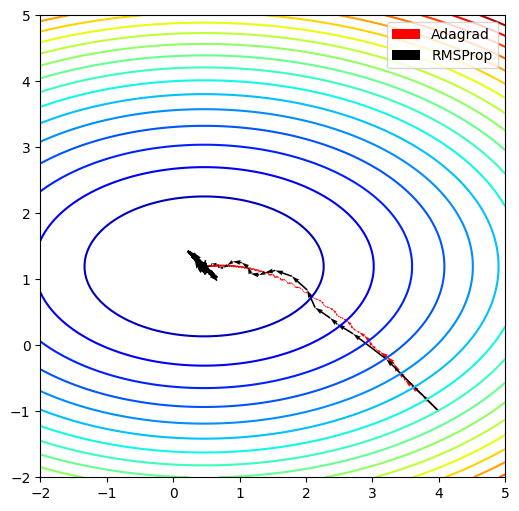

In [196]:
w0 = np.linspace(-2, 5, 101)
w1 = np.linspace(-2, 5, 101)
w0, w1 = np.meshgrid(w0, w1)
lossw = w0*0
for i in range(w0.shape[0]):
    for j in range(w0.shape[1]):
        wij = np.array([w0[i, j], w1[i, j]])
        lossw[i, j] = loss(wij, x_train, y_train)  
fig, ax = plt.subplots(figsize=(6, 6))  
ax.contour(w0, w1, lossw, cmap=plt.cm.jet, levels=np.linspace(0, max(lossw.flatten()), 20))

paths = path_adagd
paths = np.array(np.matrix(paths).T)
ax.quiver(paths[0,:-1],paths[1,:-1],paths[0,1:]-paths[0,:-1],paths[1,1:]-paths[1,:-1],scale_units='xy',angles='xy',scale=1,color='r')

paths = path_rmsprop
paths = np.array(np.matrix(paths).T)
ax.quiver(paths[0,:-1],paths[1,:-1],paths[0,1:] - paths[0,:-1], paths[1,1:]-paths[1,:-1],scale_units='xy',angles='xy',scale=1,color='k')

plt.legend(["Adagrad","RMSProp"])
plt.show()

<h1>Adam VS RMSProp</h1>

In [207]:
batch_size=10
MaxEpochs=51
epsilon=0.1
delta=1e-6

#RMSProp
rho=0.9

#Adam
delta_adam = 1e-8
rho1=0.9
rho2=0.999

In [208]:
w0=np.array([4.0,-1.0])
r=np.zeros_like(w0)
path_rmsprop=[]
for epoch in range(MaxEpochs):
    if epoch%10==0:
        print(epoch,w0,loss(w0,x_train,y_train))
    for x_batch,y_batch in generate_batches(batch_size,x_train,y_train):
        path_rmsprop.append(w0)
        grad=loss_grad(w0,x_batch,y_batch)
        r=rho*r+(1.-rho)*grad*grad
        delv=-epsilon*grad/np.sqrt(delta+r)
        w1=w0+delv
        w0=w1

0 [ 4. -1.] 4.579314993864028
10 [0.46456558 1.20512106] 0.006789718705465277
20 [0.43674458 1.21300852] 0.007058189427519757
30 [0.43674954 1.21300674] 0.007058105455299312
40 [0.43674954 1.21300674] 0.007058105454484383
50 [0.43674954 1.21300674] 0.007058105454484373


In [209]:
w0=np.array([4.0,-1.0])
s=np.zeros_like(w0)
r=np.zeros_like(w0)
path_adam=[]
t=0
for epoch in range(MaxEpochs):
    if epoch%10==0:
        print(epoch,w0,loss(w0,x_train,y_train))
    for x_batch,y_batch in generate_batches(batch_size,x_train,y_train):
        path_adam.append(w0)
        grad=loss_grad(w0,x_batch,y_batch)
        s=rho1*s+(1-rho1)*grad
        r=rho2*r+(1-rho2)*(grad*grad)
        t +=1
        shat = s/(1-rho1**t)
        rhat = r/(1-rho2**t)
        delv=-epsilon*shat/(delta_adam+np.sqrt(rhat))
        w1=w0+delv
        w0=w1

0 [ 4. -1.] 4.579314993864028
10 [0.50374253 1.27270463] 0.009991311458367447
20 [0.46748373 1.20122063] 0.00675684656345232
30 [0.46421774 1.1973704 ] 0.006741555264123772
40 [0.46458265 1.19746515] 0.0067414585756450235
50 [0.46452398 1.19749213] 0.006741575079068978


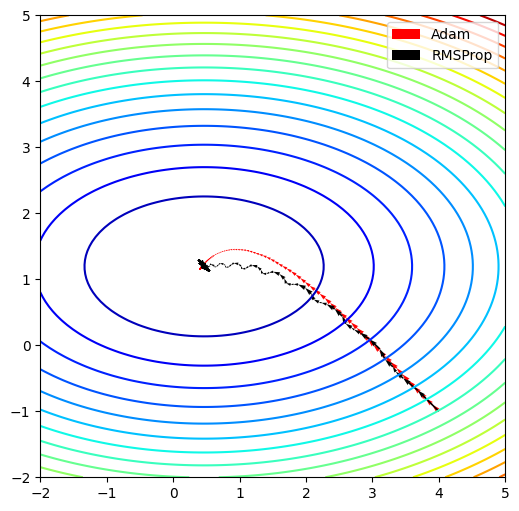

In [210]:
w0 = np.linspace(-2, 5, 101)
w1 = np.linspace(-2, 5, 101)
w0, w1 = np.meshgrid(w0, w1)
lossw = w0*0
for i in range(w0.shape[0]):
    for j in range(w0.shape[1]):
        wij = np.array([w0[i, j], w1[i, j]])
        lossw[i, j] = loss(wij, x_train, y_train)  
fig, ax = plt.subplots(figsize=(6, 6))  
ax.contour(w0, w1, lossw, cmap=plt.cm.jet, levels=np.linspace(0, max(lossw.flatten()), 20))

paths = path_adam
paths = np.array(np.matrix(paths).T)
ax.quiver(paths[0,:-1],paths[1,:-1],paths[0,1:]-paths[0,:-1],paths[1,1:]-paths[1,:-1],scale_units='xy',angles='xy',scale=1,color='r')

paths = path_rmsprop
paths = np.array(np.matrix(paths).T)
ax.quiver(paths[0,:-1],paths[1,:-1],paths[0,1:] - paths[0,:-1], paths[1,1:]-paths[1,:-1],scale_units='xy',angles='xy',scale=1,color='k')

plt.legend(["Adam","RMSProp"])
plt.show()